In [1]:
# ARC Simulation
from __future__ import division

from platform import python_version
print(python_version())

import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2, Si3N4
#from mayavi import mlab


3.10.4


In [2]:
sx=10
sy=10
sz=10
eps_Si=12
eps_air=1
eps=4
T_Si=2
T_Arc=0.1
dpml = 1.0
cell = mp.Vector3(sx+2*dpml, sy+2*dpml, 0)
pml_layers = [mp.PML(dpml)]
resolution = 50
nfreq = 1000
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [3]:
#geometry = [mp.Block(mp.Vector3(T_Si, sy, mp.inf), center=mp.Vector3(0, 0), material=mp.Medium(epsilon=eps_Si))]
geometry = [mp.Block(
                     size = mp.Vector3(sx, sy, mp.inf), 
                     center = mp.Vector3(0, 0), 
                     material=mp.Medium(epsilon=eps_air)
                    )
           ]

In [4]:
sources = [mp.Source(
                     mp.GaussianSource(fcen, fwidth=df), 
                     component=mp.Ez, 
                     center=mp.Vector3(1 , 0), 
                     size=mp.Vector3(0, 0.5*sy-2*dpml)
                    )
          ]

     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


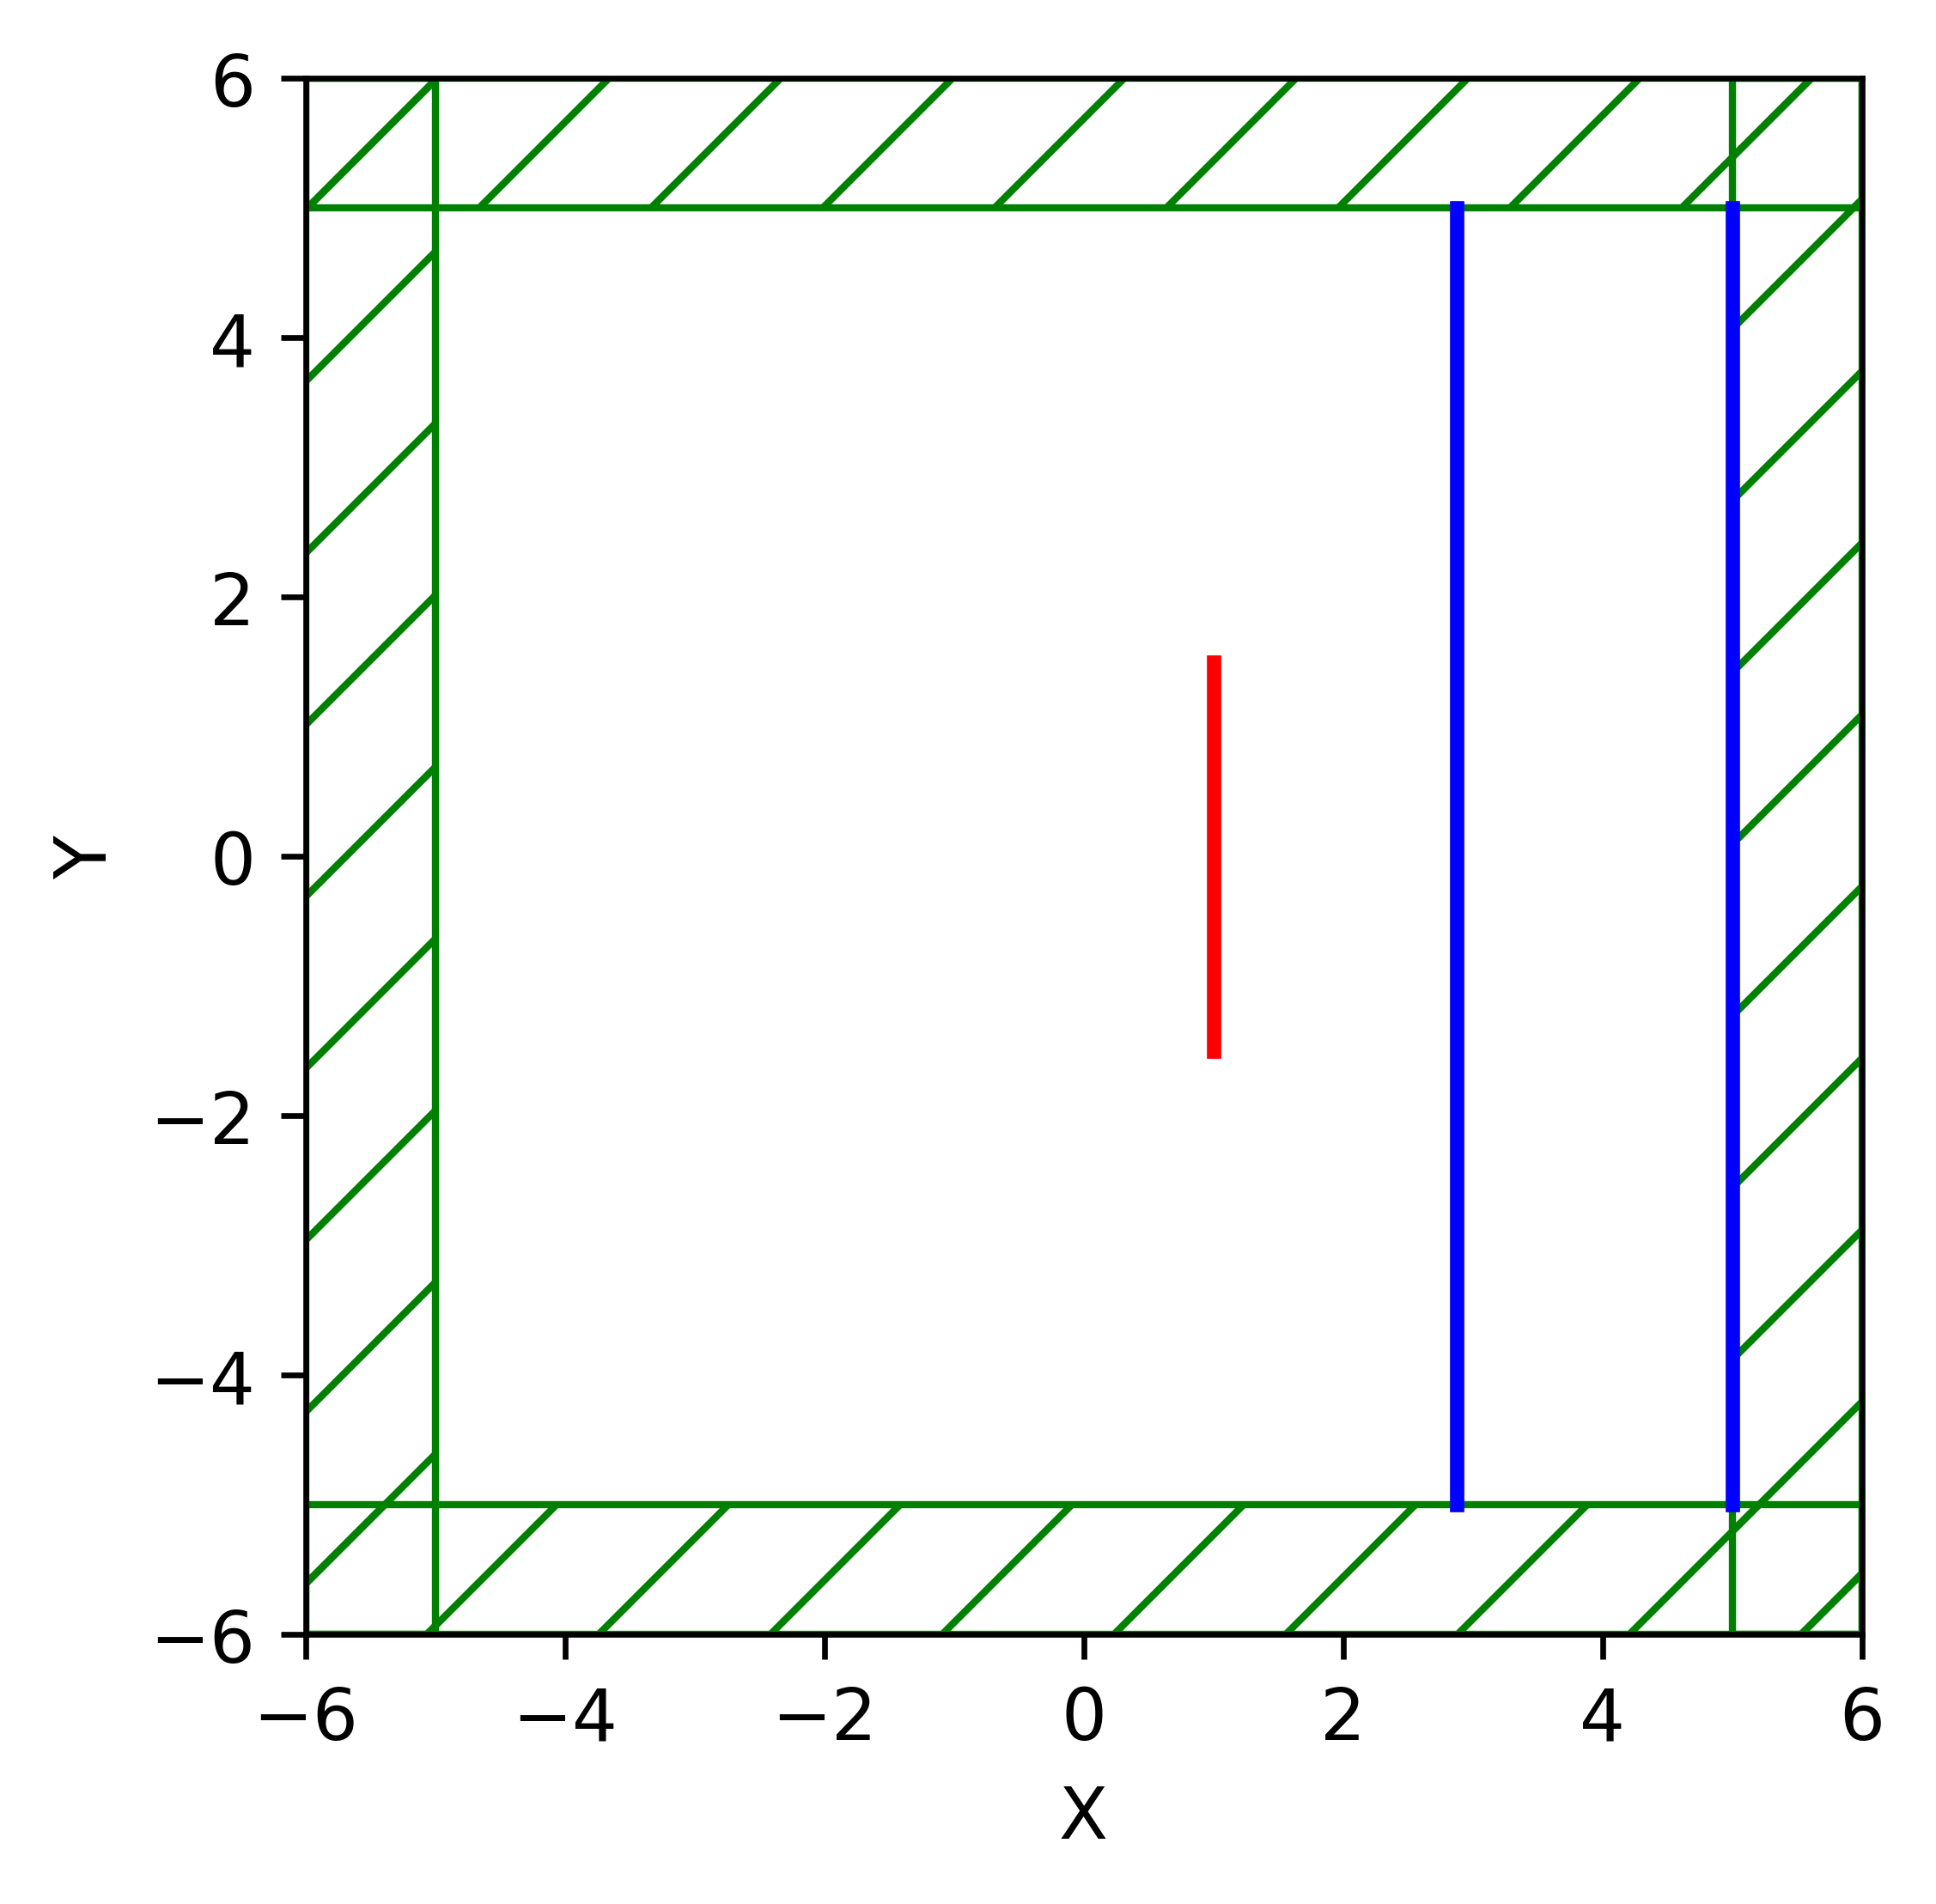

In [5]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

refl_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-T_Si-1.2*T_Arc, 0), 
                          size=mp.Vector3(0, sy)

                         )

refl_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      refl_1_fr
                     )

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                         )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr
                     )

plt.figure(dpi=600)
sim.plot2D()
plt.show()

In [6]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000956774 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 50
     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.823504 s
-----------
creating output file "./eps-000000.00.h5"...
on time step 991 (time=9.91), 0.00403715 s/step
on time step 2006 (time=20.06), 0.00394916 s/step
on time step 3105 (time=31.05), 0.00364146 s/step
on time step 4206 (time=42.06), 0.00363483 s/step
field decay(t = 50.01): 0.39441514008126954 / 0.39441514008126954 = 1.0
on time step 5200 (time=52), 0.00402617 s/step
on time step 6317 (time=63.17), 0.00358405 s/step
on time step 7383 (time=73.83), 0.00375502 s/step
on time step 8348 (time=83.48), 0.00414557 s/step
on time step 9334 (time=93.34), 0.00405703 s/step
field decay(t = 100.01): 6.323761485647929e-14 / 0.39441514008126954 = 1.

In [7]:
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)


no_ARC_ttran_flux = np.asarray(mp.get_fluxes(tran_1))
no_ARC_rrefl_flux = np.asarray(mp.get_fluxes(refl_1))
no_ARC_ttran_flux + no_ARC_rrefl_flux

array([2.75833120e-06, 2.87819559e-06, 3.00295003e-06, 3.13279325e-06,
       3.26795820e-06, 3.40869526e-06, 3.55525003e-06, 3.70784784e-06,
       3.86669338e-06, 4.03198566e-06, 4.20393998e-06, 4.38280479e-06,
       4.56886423e-06, 4.76242583e-06, 4.96380108e-06, 5.17329092e-06,
       5.39118462e-06, 5.61777240e-06, 5.85336371e-06, 6.09829969e-06,
       6.35295209e-06, 6.61770950e-06, 6.89295987e-06, 7.17908053e-06,
       7.47644265e-06, 7.78542790e-06, 8.10644788e-06, 8.43995492e-06,
       8.78643837e-06, 9.14640904e-06, 9.52038135e-06, 9.90886356e-06,
       1.03123608e-05, 1.07313884e-05, 1.11664865e-05, 1.16182282e-05,
       1.20872187e-05, 1.25740881e-05, 1.30794840e-05, 1.36040703e-05,
       1.41485298e-05, 1.47135692e-05, 1.52999199e-05, 1.59083344e-05,
       1.65395821e-05, 1.71944479e-05, 1.78737383e-05, 1.85782915e-05,
       1.93089862e-05, 2.00667438e-05, 2.08525214e-05, 2.16673013e-05,
       2.25120825e-05, 2.33878816e-05, 2.42957413e-05, 2.52367415e-05,
      

-----------
Initializing structure...
time for choose_chunkdivision = 0.000490904 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 50
     block, center = (4,0,0)
          size (2,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2.95,0,0)
          size (0.1,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.589012 s
lorentzian susceptibility: frequency=2.56968, gamma=1.44131
lorentzian susceptibility: frequency=1.73, gamma=5
lorentzian susceptibility: frequency=2.76, gamma=0.126
lorentzian susceptibility: frequency=3.64, gamma=0
-----------
     block, center = (4,0,0)
          size (2,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2.95,0,0)
          size (0.1,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
 

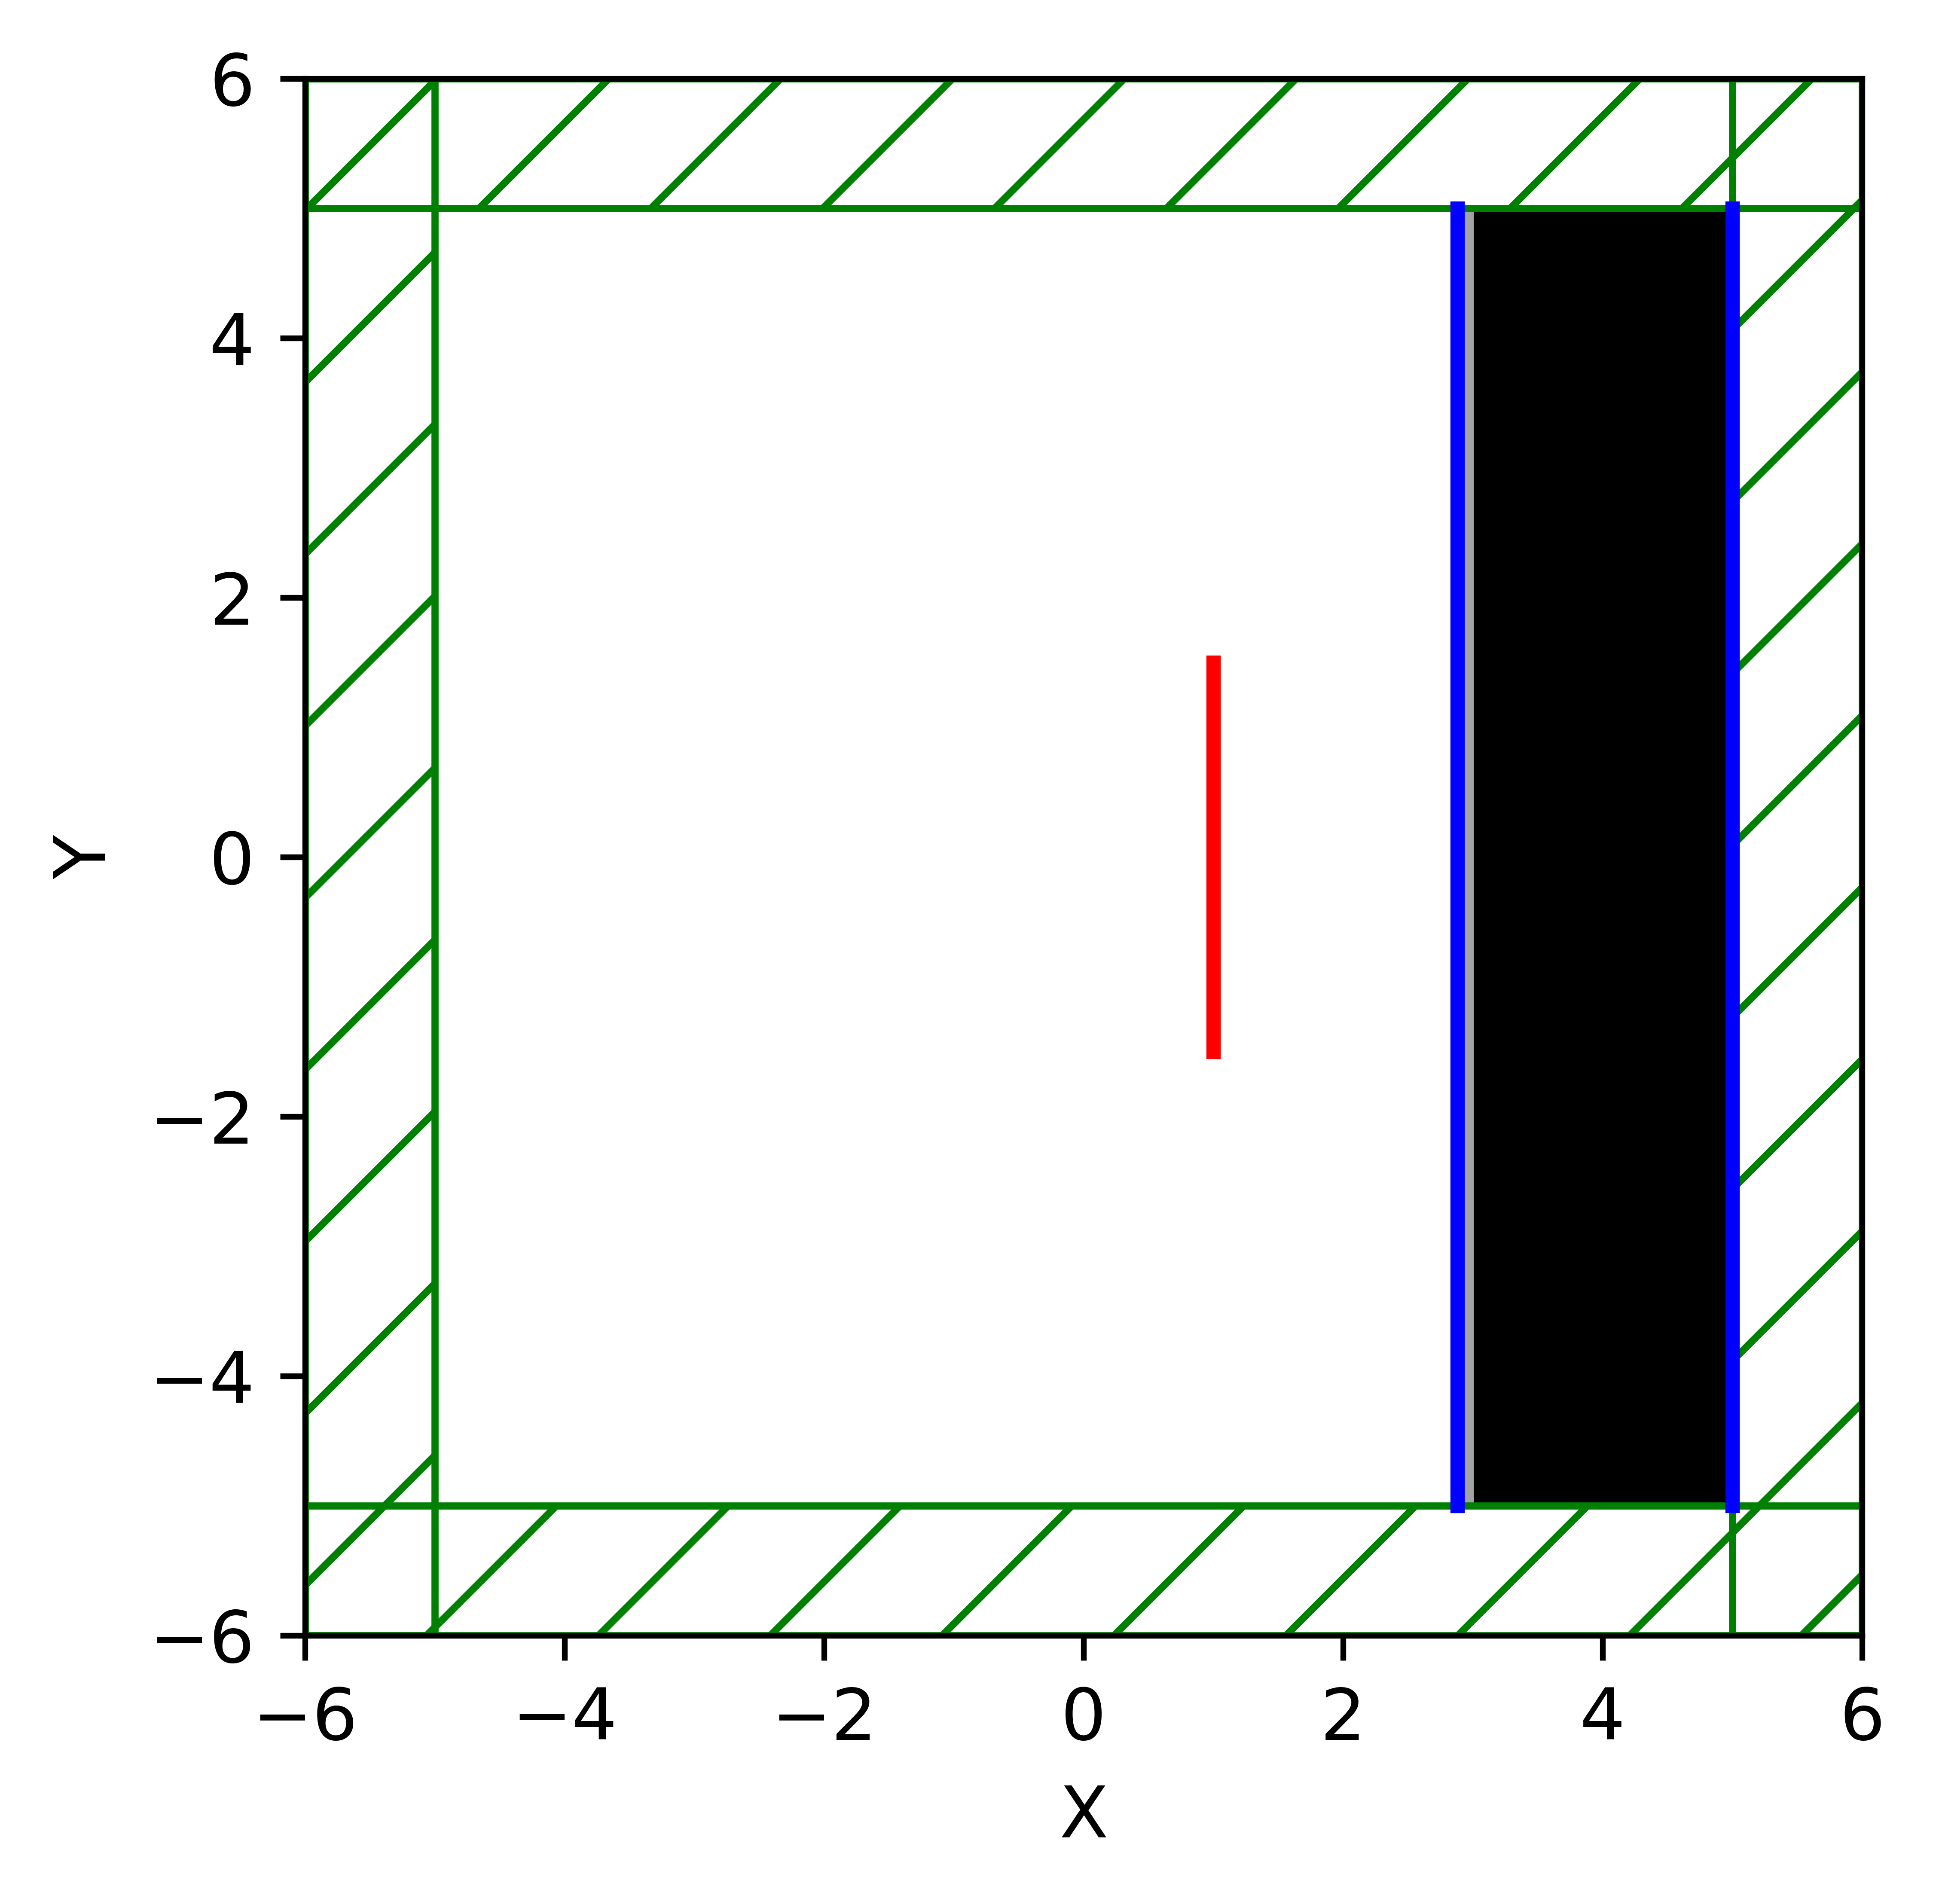

In [8]:
sim.reset_meep()
geometry = [mp.Block(
                    size=mp.Vector3(T_Si, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Si, 0),
                    material=cSi
                    ),
            mp.Block(
                    size=mp.Vector3(T_Arc, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Arc-T_Si, 0),
                    material=Si3N4)
           ]
sim = mp.Simulation(
                    cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution
                   )

#refl_1_fr = mp.FluxRegion(
#                          center=mp.Vector3(0.5*sx-dpml-0.5*T_Si-1.1*T_Arc, 0),
#                          size=mp.Vector3(0, sy)
#                          )

refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                                   )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr 
                     )

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)

plt.figure(dpi=1200)
sim.plot2D()
plt.show()




In [9]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

creating output file "./eps-000000.00.h5"...


/Users/yu-chengchiou/opt/anaconda3/envs/mp/lib/python3.10/site-packages/meep/simulation.py:1343: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/Users/yu-chengchiou/opt/anaconda3/envs/mp/lib/python3.10/site-packages/meep/simulation.py:1347: RuntimeWarning: DFT frequency 1.0 is out of material's range of 1.2048192771084338-2.5
  warnings.warn(warn_dft_fmt.format(dftf, min_freq, max_freq), RuntimeWarning)


on time step 392 (time=3.92), 0.0102096 s/step
on time step 821 (time=8.21), 0.00933992 s/step
on time step 1262 (time=12.62), 0.00908707 s/step
on time step 1678 (time=16.78), 0.00961707 s/step
on time step 2108 (time=21.08), 0.00933455 s/step
on time step 2501 (time=25.01), 0.0102128 s/step
on time step 2888 (time=28.88), 0.0103466 s/step
on time step 3303 (time=33.03), 0.00963912 s/step
on time step 3709 (time=37.09), 0.00986175 s/step
on time step 4096 (time=40.96), 0.0103556 s/step
on time step 4379 (time=43.79), 0.0142349 s/step
on time step 4764 (time=47.64), 0.0103931 s/step
field decay(t = 50.01): 0.0015124455336935877 / 0.0015124455336935877 = 1.0
on time step 5174 (time=51.74), 0.00975634 s/step
on time step 5421 (time=54.21), 0.0162221 s/step
on time step 5724 (time=57.24), 0.0132079 s/step
on time step 6031 (time=60.31), 0.0130362 s/step
on time step 6445 (time=64.45), 0.00966945 s/step
on time step 6917 (time=69.17), 0.00848665 s/step
on time step 7324 (time=73.24), 0.009

In [10]:
#no_ARC_refl_data

In [11]:
#no_ARC_refl_flux

In [12]:
#no_ARC_tran_flux

In [13]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 
import pandas as pd
df = pd.DataFrame(list(zip(wl, Rs, Ts)), columns = ['wl', 'Rs', 'Ts'])
df.to_csv('with_ARC.csv')

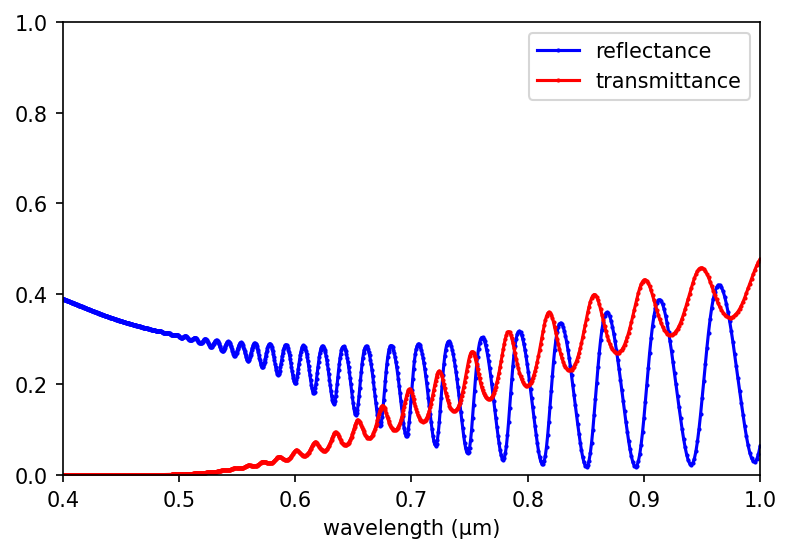

In [14]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance', markersize = 1)
    plt.plot(wl,Ts,'ro-',label='transmittance', markersize = 1)
    #plt.plot(wl,1-Rs-Ts,'go-',label='loss or Absorption')
    plt.axis([.4, 1.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()